<a href="https://colab.research.google.com/github/trilokgit/Read/blob/main/Malware_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# DATASET LINK ---> https://drive.google.com/file/d/1y-Cu6b2gXxpFxLMYqAJHOgKSaawSqJha/view?usp=share_link# df1 = pd.read_csv('/content/06_18_2017-be-20170222-apps-sk.shortcut.videocalls.pcap_ISCX.csv',skipinitialspace = True,low_memory=False)
# df2 = pd.read_csv('/content/08_22_2017-ra-jisut-eset-12fb8804389e7496ff5a56e2134ccf5e.pcap_ISCX.csv',skipinitialspace = True,low_memory=False)
# df3 = pd.read_csv('/content/Benign_Ransomeware_malware_file_4.5L.csv',skipinitialspace = True,low_memory=False)
# df4 = pd.read_csv('/content/DATA_SET_ONLY_RANSOMEWARE_TYPE.csv',skipinitialspace = True,low_memory=False)
# df4 = pd.read_csv('/content/Benign_Ransomeware_malware_file_2.5L.csv',skipinitialspace = True,low_memory=False)
# df4 = pd.read_csv('/content/data_1L.csv',skipinitialspace = True,low_memory=False)
df4 = pd.read_csv('/content/small_45k.csv',skipinitialspace = True,low_memory=False)
# df4 = df4.sample(frac=1)
# df4 = df4[:10000]

In [ ]:
df = pd.concat([df4])
df_train = df

In [ ]:
df.shape

(45000, 85)

In [ ]:
df.tail()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
44995,10.42.0.211-10.42.0.1-35783-53-17,10.42.0.211,35783,10.42.0.1,53,17,30-08-2017 08:48,688332,1,1,...,32,0,0.0,0,0,0.0,0.00,0,0,RANSOMWARE_CHARGER
44996,10.42.0.211-10.42.0.1-16922-53-17,10.42.0.211,16922,10.42.0.1,53,17,30-08-2017 08:57,187910,1,1,...,20,0,0.0,0,0,0.0,0.00,0,0,RANSOMWARE_CHARGER
44997,10.42.0.211-123.125.29.220-33772-80-6,10.42.0.211,33772,123.125.29.220,80,6,30-08-2017 09:20,31059819,6,0,...,40,7019008,0.0,7019008,7019008,12020405.5,5676953.76,16034618,8006193,RANSOMWARE_CHARGER
44998,239.255.255.250-10.42.0.211-1900-33200-17,10.42.0.211,33200,239.255.255.250,1900,17,30-08-2017 09:06,869,4,0,...,32,0,0.0,0,0,0.0,0.00,0,0,RANSOMWARE_CHARGER
44999,157.240.18.10-10.42.0.211-443-39451-6,10.42.0.211,39451,157.240.18.10,443,6,30-08-2017 08:43,871,2,0,...,20,0,0.0,0,0,0.0,0.00,0,0,RANSOMWARE_CHARGER


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow ID                      45000 non-null  object 
 1   Source IP                    45000 non-null  object 
 2   Source Port                  45000 non-null  int64  
 3   Destination IP               45000 non-null  object 
 4   Destination Port             45000 non-null  int64  
 5   Protocol                     45000 non-null  int64  
 6   Timestamp                    45000 non-null  object 
 7   Flow Duration                45000 non-null  int64  
 8   Total Fwd Packets            45000 non-null  int64  
 9   Total Backward Packets       45000 non-null  int64  
 10  Total Length of Fwd Packets  45000 non-null  int64  
 11  Total Length of Bwd Packets  45000 non-null  int64  
 12  Fwd Packet Length Max        45000 non-null  int64  
 13  Fwd Packet Lengt

In [ ]:
df = df.drop(['Timestamp','Flow ID'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 83 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Source IP                    45000 non-null  object 
 1   Source Port                  45000 non-null  int64  
 2   Destination IP               45000 non-null  object 
 3   Destination Port             45000 non-null  int64  
 4   Protocol                     45000 non-null  int64  
 5   Flow Duration                45000 non-null  int64  
 6   Total Fwd Packets            45000 non-null  int64  
 7   Total Backward Packets       45000 non-null  int64  
 8   Total Length of Fwd Packets  45000 non-null  int64  
 9   Total Length of Bwd Packets  45000 non-null  int64  
 10  Fwd Packet Length Max        45000 non-null  int64  
 11  Fwd Packet Length Min        45000 non-null  int64  
 12  Fwd Packet Length Mean       45000 non-null  float64
 13  Fwd Packet Lengt

In [ ]:
df['Source IP'].value_counts()

10.42.0.211       19579
10.42.0.42        15267
10.42.0.151        4461
10.42.0.1           396
8.6.0.1             228
                  ...  
52.85.95.250          1
36.248.26.164         1
203.205.158.25        1
74.125.192.156        1
202.77.129.146        1
Name: Source IP, Length: 788, dtype: int64

In [ ]:
df['Destination IP'].value_counts()

10.42.0.1          8636
10.42.0.211        2510
10.42.0.42         1975
180.149.136.194     686
119.146.74.48       678
                   ... 
217.132.36.186        1
188.124.98.28         1
42.144.155.176        1
74.119.118.71         1
41.83.40.229          1
Name: Destination IP, Length: 1471, dtype: int64

In [ ]:
df['Label'].value_counts()

BENIGN                22546
RANSOMWARE_CHARGER    22454
Name: Label, dtype: int64

In [ ]:
object_feature = df.select_dtypes(include='object').columns.tolist()
print(object_feature)

['Source IP', 'Destination IP', 'Label']


In [ ]:
df[object_feature].tail(2)

,Source IP,Destination IP,Label
44998,10.42.0.211,239.255.255.250,RANSOMWARE_CHARGER
44999,10.42.0.211,157.240.18.10,RANSOMWARE_CHARGER


In [ ]:
df = pd.get_dummies(df,columns=object_feature,prefix=object_feature,drop_first=True)

In [ ]:
df.shape

(45000, 2338)

In [ ]:
df.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Destination IP_98.138.81.73,Destination IP_98.139.180.180,Destination IP_98.139.180.181,Destination IP_98.139.183.24,Destination IP_98.139.199.204,Destination IP_98.139.199.205,Destination IP_98.139.225.43,Destination IP_98.221.60.177,Destination IP_99.224.25.39,Label_RANSOMWARE_CHARGER
0,53858,443,6,15410,2,0,85,0,85,0,...,0,0,0,0,0,0,0,0,0,0
1,443,53858,6,65,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,443,38804,6,39,2,0,42,0,42,0,...,0,0,0,0,0,0,0,0,0,0
3,38804,443,6,476,3,0,42,0,42,0,...,0,0,0,0,0,0,0,0,0,0
4,43508,443,6,36427,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.tail(2)

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Destination IP_98.138.81.73,Destination IP_98.139.180.180,Destination IP_98.139.180.181,Destination IP_98.139.183.24,Destination IP_98.139.199.204,Destination IP_98.139.199.205,Destination IP_98.139.225.43,Destination IP_98.221.60.177,Destination IP_99.224.25.39,Label_RANSOMWARE_CHARGER
44998,33200,1900,17,869,4,0,530,0,133,132,...,0,0,0,0,0,0,0,0,0,1
44999,39451,443,6,871,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(45000, 2338)

In [ ]:
len = df.shape[0]
len

45000

In [ ]:
x_train = df[:len].drop(['Label_RANSOMWARE_CHARGER'],axis=1)
y_train = df['Label_RANSOMWARE_CHARGER']

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thre = VarianceThreshold(threshold = 0.0)
var_thre.fit(x_train)

VarianceThreshold()

In [ ]:
var_thre.get_support()

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
constant_columns = [column for column in x_train.columns if column not in x_train.columns[var_thre.get_support()]]

In [ ]:
x_train = x_train.drop([column for column in constant_columns],axis = 1)
x_train.shape

(45000, 2325)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.3,random_state=1)

In [ ]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (31500, 2325)
y_train (31500,)
x_test (13500, 2325)
y_test (13500,)


In [ ]:
x_train.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Destination IP_98.138.49.44,Destination IP_98.138.81.73,Destination IP_98.139.180.180,Destination IP_98.139.180.181,Destination IP_98.139.183.24,Destination IP_98.139.199.204,Destination IP_98.139.199.205,Destination IP_98.139.225.43,Destination IP_98.221.60.177,Destination IP_99.224.25.39
20752,1167,53,17,137205,1,1,27,59,27,27,...,0,0,0,0,0,0,0,0,0,0
42243,35528,443,6,6407725,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20589,30049,53,17,50860,1,1,31,47,31,31,...,0,0,0,0,0,0,0,0,0,0
23732,55470,443,6,13980725,7,6,334,3240,208,0,...,0,0,0,0,0,0,0,0,0,0
2541,80,45194,6,2094,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.tail(10)

7751     0
20609    0
32912    1
21440    0
7813     0
43723    1
32511    1
5192     0
12172    0
33003    1
Name: Label_RANSOMWARE_CHARGER, dtype: uint8

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
sc.fit(x_train)
sc.fit(x_test)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train[:3,:]

array([[-2.03015708, -0.38895681,  1.7803623 , ..., -0.01721581,
         0.        , -0.01217251],
       [-0.17007494, -0.36353379, -0.5463045 , ..., -0.01721581,
         0.        , -0.01217251],
       [-0.46667254, -0.38895681,  1.7803623 , ..., -0.01721581,
         0.        , -0.01217251]])

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

from sklearn import svm
from xgboost import XGBClassifier


In [241]:
model_acc_class = []

In [293]:
f1_score_array = []
recall_score_array = []
precision_score_array = []

In [ ]:
svr = SVR()
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()

In [242]:
kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=7)
model = AdaBoostClassifier(n_estimators=30,random_state=7)
results = model_selection.cross_val_score(model,x_train,y_train,cv=kfold)
print(results.mean())
m1 = results.mead()*100;
model_acc_class.append(results.mean()*100)

0.9986349206349207


In [245]:
from sklearn import svm
from xgboost import XGBClassifier
clf = XGBClassifier()
seed = 7
num_trees=30
kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=seed)
model = XGBClassifier(n_estimators=num_trees,random_state=seed)
results = model_selection.cross_val_score(model,x_train,y_train,cv=kfold)
print(results.mean())
m2 = results.mean()*100;
model_acc_class.append(m2)

0.9951111111111113


In [ ]:
clf.fit(x_train,y_train)
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pred_clf = clf.predict(x_test)
y_pred_abc = abc.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [290]:
a1 = (precision_score(y_test,y_pred_clf,average='weighted'))
a2 = (recall_score(y_test,y_pred_clf,average='weighted'))
a3 = (f1_score(y_test,y_pred_clf,average='weighted'))
# f1_score_array.append(a3*100)
# recall_score_array.append(a2*100)
# precision_score_array.append(a1*100)

In [294]:
b1 = (precision_score(y_test,y_pred_abc,average='weighted'))
b2 = (recall_score(y_test,y_pred_abc,average='weighted'))
b3 = (f1_score(y_test,y_pred_abc,average='weighted'))
f1_score_array.append(b3*100)
recall_score_array.append(b2*100)
precision_score_array.append(b1*100)
f1_score_array.append(a3*100)
recall_score_array.append(a2*100)
precision_score_array.append(a1*100)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6766
           1       1.00      1.00      1.00      6734

    accuracy                           1.00     13500
   macro avg       1.00      1.00      1.00     13500
weighted avg       1.00      1.00      1.00     13500



In [ ]:
print(classification_report(y_test,y_pred_abc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6766
           1       1.00      1.00      1.00      6734

    accuracy                           1.00     13500
   macro avg       1.00      1.00      1.00     13500
weighted avg       1.00      1.00      1.00     13500



In [ ]:
models = {
    "a" : ["LinearRegression",lr],
    "b" : ["SVR",svr],
    "c" : ["KNeighborsRegressor",knr],
    "d" : ["DecisionTreeRegressor",dtr],
    "e" : ["GradientBoostingRegressor",gbr],
    "f" : ["RandomForestRegressor",rfr],
    "g" : ["AdaBoostRegressor",abr],
}

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=x_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [ ]:
models_score = []
for model in models:
  print("Training model : " , models[model][0])
  score = test_model(models[model][1])
  print("score of model is : " , score)
  models_score.append([models[model][0],score])

Training model :  LinearRegression
score of model is :  [-2.71286467392849e+24]
Training model :  SVR
score of model is :  [0.8984487852752476]
Training model :  KNeighborsRegressor
score of model is :  [0.7985443183407007]
Training model :  DecisionTreeRegressor
score of model is :  [0.9942854761258659]
Training model :  GradientBoostingRegressor
score of model is :  [0.9945968011741732]
Training model :  RandomForestRegressor
score of model is :  [0.9964259305562075]
Training model :  AdaBoostRegressor
score of model is :  [0.989462340412511]


In [ ]:
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred_dt = dt.predict(x_test)
acc_dt = round(dt.score(x_test,y_test)*100,2)
print(acc_dt)

99.9


In [297]:
c1 = (precision_score(y_test,y_pred_dt,average='weighted'))
c2 = (recall_score(y_test,y_pred_dt,average='weighted'))
c3 = (f1_score(y_test,y_pred_dt,average='weighted'))
f1_score_array.append(c3*100)
recall_score_array.append(c2*100)
precision_score_array.append(c1*100)

In [248]:
model_acc_class.append(acc_dt)

In [300]:
#random forest
random_forest = RandomForestClassifier(n_estimators=20)
random_forest.fit(x_train,y_train)

Y_pred_rf = random_forest.predict(x_test)

random_forest.score(x_test,y_test)
acc_random_forest = round(random_forest.score(x_test,y_test) * 100, 2)
print(acc_random_forest)

99.84


In [301]:
d1 = (precision_score(y_test,Y_pred_rf,average='weighted'))
d2 = (recall_score(y_test,Y_pred_rf,average='weighted'))
d3 = (f1_score(y_test,Y_pred_rf,average='weighted'))
f1_score_array.append(d3*100)
recall_score_array.append(d2*100)
precision_score_array.append(d1*100)

In [249]:
model_acc_class.append(acc_random_forest)

In [302]:
#stochastic gradient descent
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train,y_train)
y_pred_sgd = sgd.predict(x_test)
sgd.score(x_test,y_test)
acc_sgd = round(sgd.score(x_test, y_test) * 100, 2)
print(acc_sgd)

99.36


In [303]:
e1 = (precision_score(y_test,y_pred_sgd,average='weighted'))
e2 = (recall_score(y_test,y_pred_sgd,average='weighted'))
e3 = (f1_score(y_test,y_pred_sgd,average='weighted'))
f1_score_array.append(e3*100)
recall_score_array.append(e2*100)
precision_score_array.append(e1*100)

In [252]:
model_acc_class.append(acc_sgd)

In [304]:
#Logistic regression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

y_pred_lr = logistic.predict(x_test)

acc_logistic = round(logistic.score(x_test,y_test)*100,2)
print(acc_logistic)

99.86


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [305]:
f1 = (precision_score(y_test,y_pred_lr,average='weighted'))
f2 = (recall_score(y_test,y_pred_lr,average='weighted'))
f3 = (f1_score(y_test,y_pred_lr,average='weighted'))
f1_score_array.append(f3*100)
recall_score_array.append(f2*100)
precision_score_array.append(f1*100)

In [250]:
model_acc_class.append(acc_logistic)

In [253]:
model_acc_class

[99.86349206349206, 99.51111111111113, 99.9, 99.79, 99.86, 99.39]

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
acc_knn = round(knn.score(x_test,y_test)*100,2)
print(acc_knn,y_pred_knn)

88.87 [0 0 1 ... 1 0 1]


In [306]:
g1 = (precision_score(y_test,y_pred_knn,average='weighted'))
g2 = (recall_score(y_test,y_pred_knn,average='weighted'))
g3 = (f1_score(y_test,y_pred_knn,average='weighted'))
f1_score_array.append(g3*100)
recall_score_array.append(g2*100)
precision_score_array.append(g1*100)

In [254]:
model_acc_class.append(acc_knn)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]

In [ ]:
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())

In [255]:
m3 = clf.fit(x_train, y_train).score(x_test, y_test)

In [264]:
m3

0.9991111111111111

In [258]:
model_acc_class.append(round(m3,2)*100)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
     voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
     scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=5)
     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 1.00 (+/- 0.00) [Logistic Regression]
Accuracy: 1.00 (+/- 0.00) [Random Forest]
Accuracy: 0.99 (+/- 0.00) [naive Bayes]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 1.00 (+/- 0.00) [Ensemble]


In [309]:
eclf.fit(x_train, y_train)
acc_eclf = round(eclf.score(x_test,y_test) * 100, 2)
print(acc_eclf)
y_pred_eclf = eclf.predict(x_test)
print(y_pred_eclf)
i1 = (precision_score(y_test,y_pred_eclf,average='weighted'))
i2 = (recall_score(y_test,y_pred_eclf,average='weighted'))
i3 = (f1_score(y_test,y_pred_eclf,average='weighted'))
f1_score_array.append(i3*100)
recall_score_array.append(i2*100)
precision_score_array.append(i1*100)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


99.96
[1 0 1 ... 1 0 1]


In [260]:
model_acc_class.append(acc_eclf)

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred_knn,average='weighted')
# recall_score(y_test,y_pred_knn,average='weighted')
# f1_score(y_test,y_pred_knn,average='weighted')

0.891489335806017

In [ ]:
recall_score(y_test,y_pred_knn,average='weighted')
# f1_score(y_test,y_pred_knn,average='weighted')

0.8886666666666667

In [ ]:
f1_score(y_test,y_pred_knn,average='weighted')

0.8884783557918776

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      6766
           1       0.86      0.93      0.89      6734

    accuracy                           0.89     13500
   macro avg       0.89      0.89      0.89     13500
weighted avg       0.89      0.89      0.89     13500



In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=30)
decision_tree.fit(x_train, y_train)
acc_decision_tree = round(decision_tree.score(x_test,y_test) * 100, 2)
print(acc_decision_tree)
y_pred_dt = decision_tree.predict(x_test)
print(y_pred_dt)
print(precision_score(y_test,y_pred_dt,average='weighted'))
print(recall_score(y_test,y_pred_dt,average='weighted'))
print(f1_score(y_test,y_pred_dt,average='weighted'))

99.9
[1 0 1 ... 1 0 1]
0.9990373091689196
0.9990370370370371
0.9990370360595364


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]

In [ ]:
sta = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
sta.fit(x_train, y_train).score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

0.9992592592592593

In [307]:
pred_sta = sta.predict(x_test)
# print(pred_sta)
h1 = (precision_score(y_test,pred_sta,average='weighted'))
h2 = (recall_score(y_test,pred_sta,average='weighted'))
h3 = (f1_score(y_test,pred_sta,average='weighted'))
f1_score_array.append(h3*100)
recall_score_array.append(h2*100)
precision_score_array.append(h1*100)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
true_values = y_test.tolist()

In [320]:
y_pred_sgd = sgd.predict(x_test).tolist()
y_pred_randomForest = random_forest.predict(x_test).tolist()
y_pred_logistic = logistic.predict(x_test).tolist()
y_pred_decisionTree = dt.predict(x_test).tolist()
y_pred_knn = knn.predict(x_test).tolist()
y_pred_adaboost = abc.predict(x_test).tolist();
y_pred_xgboost = clf.predict(x_test).tolist();
y_pred_staking=  sta.predict(x_test).tolist();
y_pred_voting = eclf.predict(x_test).tolist();

In [321]:
cf_matrix_abc = confusion_matrix(true_values,y_pred_adaboost)
cf_matrix_xgb = confusion_matrix(true_values,y_pred_xgboost)
cf_matrix_staking = confusion_matrix(true_values,y_pred_staking)
cf_matrix_voting = confusion_matrix(true_values,y_pred_voting)


In [ ]:
cf_matrix_randomForest = confusion_matrix(true_values, y_pred_randomForest)
cf_matrix_knn = confusion_matrix(true_values, y_pred_knn)
cf_matrix_logistic = confusion_matrix(true_values, y_pred_logistic)
cf_matrix_dt = confusion_matrix(true_values, y_pred_decisionTree)

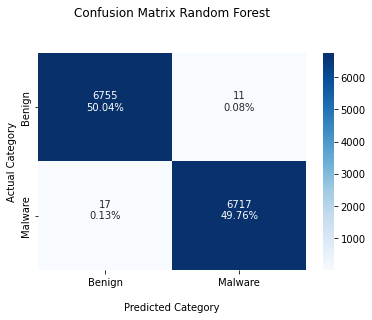

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_randomForest.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_randomForest.flatten()/np.sum(cf_matrix_randomForest)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_randomForest, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix Random Forest\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Malware'])
ax.yaxis.set_ticklabels(['Benign','Malware'])

## Display the visualization of the Confusion Matrix.
plt.show()

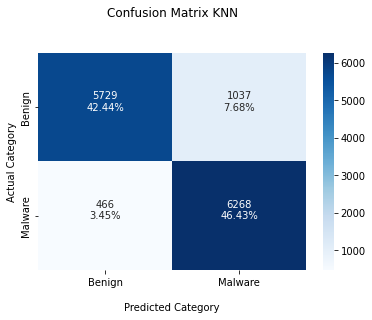

In [ ]:
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_knn.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_knn.flatten()/np.sum(cf_matrix_knn)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_knn, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix KNN\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Malware'])
ax.yaxis.set_ticklabels(['Benign','Malware'])

## Display the visualization of the Confusion Matrix.
plt.show()

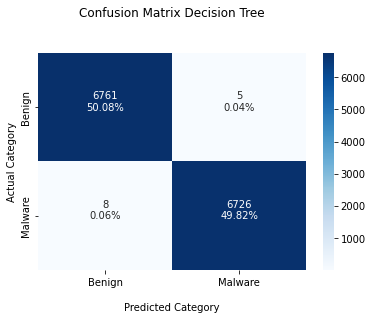

In [ ]:
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_dt.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_dt.flatten()/np.sum(cf_matrix_dt)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_dt, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix Decision Tree\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Malware'])
ax.yaxis.set_ticklabels(['Benign','Malware'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

In [ ]:
name = [models_score[1][0],models_score[2][0],models_score[3][0],models_score[4][0],models_score[5][0],models_score[6][0]]
name

['SVR',
 'KNeighborsRegressor',
 'DecisionTreeRegressor',
 'GradientBoostingRegressor',
 'RandomForestRegressor',
 'AdaBoostRegressor']

In [ ]:
val = [models_score[1][1][0]*100,models_score[2][1][0]*100,models_score[3][1][0]*100,
       models_score[4][1][0]*100,models_score[5][1][0]*100,models_score[6][1][0]*100]
val

[88.91341656915459,
 76.24952155493499,
 99.3904648971517,
 99.37948556898264,
 99.53205011865143,
 98.9288031209155]

Text(0.5, 0, 'Model Name')

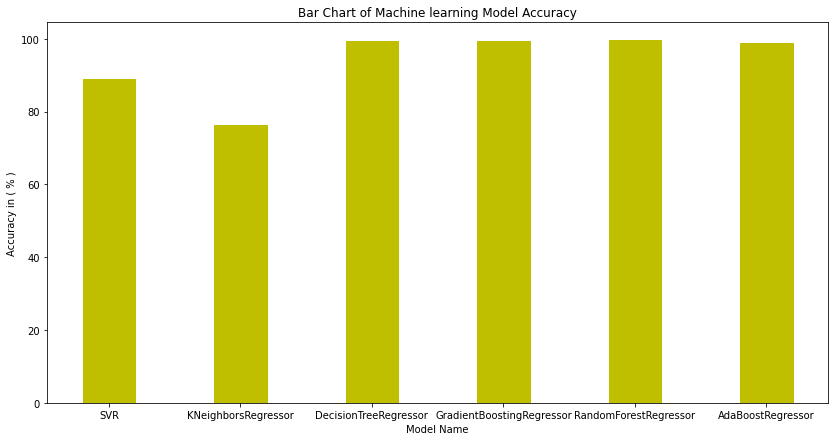

In [273]:
plt.figure(figsize = (14,7))
plt.bar(name, val,color="y",edgecolor="y",width=0.4,align="center")
plt.title("Bar Chart of Machine learning Model Accuracy")
plt.ylabel("Accuracy in ( % )")
plt.xlabel("Model Name")

In [262]:
a = []
for x in model_acc_class:
  a.append(round(x,2))

In [265]:
model_name = ["AdaBiistClassifier","XGBClassifier","Decision Tree","Random Forest","SGD","Logistic Regression","KNN","Stacking","Voting"]

Text(0.5, 0, 'Machine Learning Model')

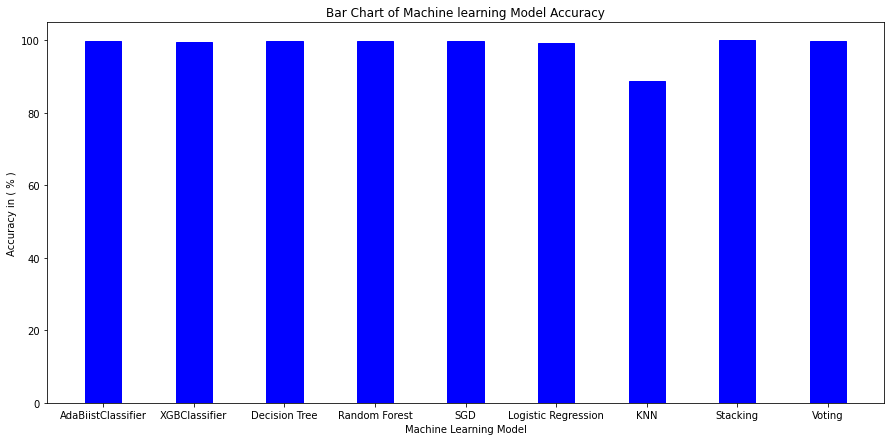

In [275]:
plt.figure(figsize = (15,7))
plt.bar(model_name,model_acc_class,color="b",edgecolor="b",width=0.4,align="center")
plt.title("Bar Chart of Machine learning Model Accuracy")
plt.ylabel("Accuracy in ( % )")
plt.xlabel("Machine Learning Model")

Text(0.5, 0, 'Machine Learning Model')

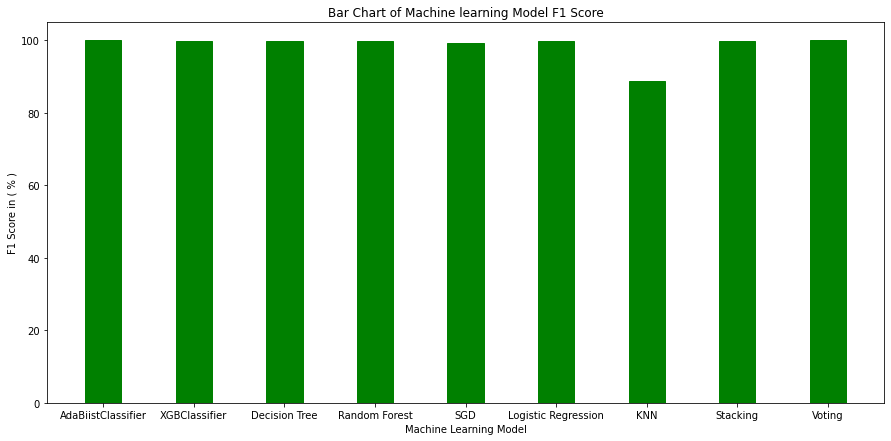

In [314]:
plt.figure(figsize = (15,7))
plt.bar(model_name,f1_score_array,color="g",edgecolor="g",width=0.4,align="center")
plt.title("Bar Chart of Machine learning Model F1 Score")
plt.ylabel("F1 Score in ( % )")
plt.xlabel("Machine Learning Model")

Text(0.5, 0, 'Machine Learning Model')

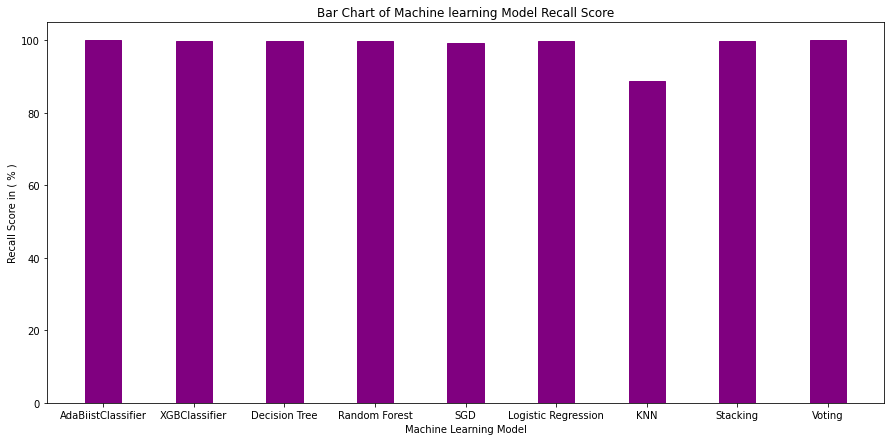

In [315]:
plt.figure(figsize = (15,7))
plt.bar(model_name,recall_score_array,color="purple",edgecolor="purple",width=0.4,align="center")
plt.title("Bar Chart of Machine learning Model Recall Score")
plt.ylabel("Recall Score in ( % )")
plt.xlabel("Machine Learning Model")

Text(0.5, 0, 'Machine Learning Model')

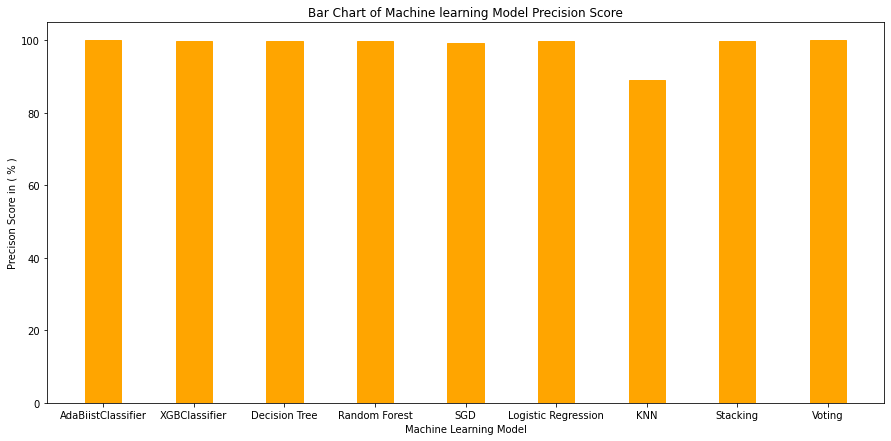

In [316]:
plt.figure(figsize = (15,7))
plt.bar(model_name,precision_score_array,color="orange",edgecolor="orange",width=0.4,align="center")
plt.title("Bar Chart of Machine learning Model Precision Score")
plt.ylabel("Precison Score in ( % )")
plt.xlabel("Machine Learning Model")

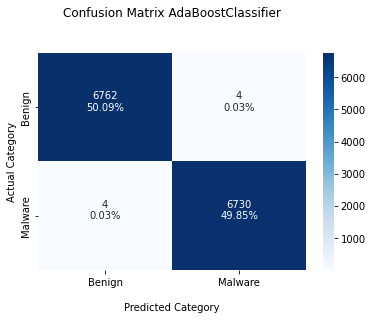

In [322]:
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_abc.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_abc.flatten()/np.sum(cf_matrix_abc)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_abc, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix AdaBoostClassifier\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Malware'])
ax.yaxis.set_ticklabels(['Benign','Malware'])

## Display the visualization of the Confusion Matrix.
plt.show()

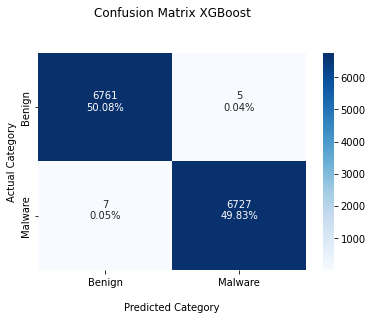

In [327]:
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_xgb.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_xgb.flatten()/np.sum(cf_matrix_xgb)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_xgb, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix XGBoost\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Malware'])
ax.yaxis.set_ticklabels(['Benign','Malware'])

## Display the visualization of the Confusion Matrix.
plt.show()

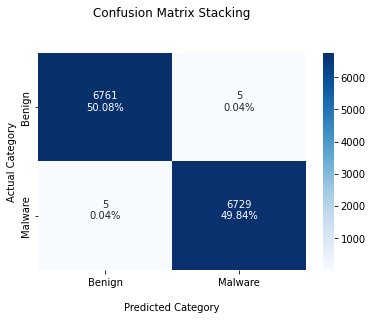

In [326]:
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_staking.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_staking.flatten()/np.sum(cf_matrix_staking)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_staking, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix Stacking\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Malware'])
ax.yaxis.set_ticklabels(['Benign','Malware'])

## Display the visualization of the Confusion Matrix.
plt.show()

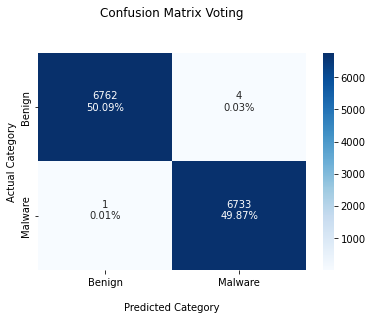

In [328]:
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_voting.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_voting.flatten()/np.sum(cf_matrix_voting)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_voting, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix Voting\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Malware'])
ax.yaxis.set_ticklabels(['Benign','Malware'])

## Display the visualization of the Confusion Matrix.
plt.show()